In [55]:
#import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [3]:
data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]
print(data)

[50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]


In [4]:
#load data in numpy array
grades = np.array(data)
print(grades)

[50 50 47 97 49  3 53 42 26 74 82 62 37 15 70 27 36 35 48 52 63 64]


In [5]:
#compare numpy array and python list
print(type(data), "*2:", data*2)
print('-----')
print(type(grades), '*2:', grades*2)

<class 'list'> *2: [50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64, 50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]
-----
<class 'numpy.ndarray'> *2: [100 100  94 194  98   6 106  84  52 148 164 124  74  30 140  54  72  70
  96 104 126 128]


In [6]:
# Define an array of study hours
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

# Create a 2D array (an array of arrays)
student_data = np.array([study_hours, grades])

# display the array
student_data

array([[10.  , 11.5 ,  9.  , 16.  ,  9.25,  1.  , 11.5 ,  9.  ,  8.5 ,
        14.5 , 15.5 , 13.75,  9.  ,  8.  , 15.5 ,  8.  ,  9.  ,  6.  ,
        10.  , 12.  , 12.5 , 12.  ],
       [50.  , 50.  , 47.  , 97.  , 49.  ,  3.  , 53.  , 42.  , 26.  ,
        74.  , 82.  , 62.  , 37.  , 15.  , 70.  , 27.  , 36.  , 35.  ,
        48.  , 52.  , 63.  , 64.  ]])

In [7]:
#show shape of the student_data array
student_data.shape

(2, 22)

In [8]:
#show the first element of the first element in student_data
student_data[0][0]

10.0

In [9]:
#Get the mean value of each sub-array
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean() 
print('The average study hours:{:.2f}\nThe average grade:{:.2f}'.format(avg_study,avg_grade))

The average study hours:10.52
The average grade:49.18


In [10]:
df_students = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny',
                                     'Jakeem','Helena','Ismat','Anila','Skye','Daniel','Aisha'],
                            'StudyHours':student_data[0],
                            'Grade':student_data[1]})

df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [11]:
#Using filter in dataframe(Get the data for index value 5)
df_students.loc[5]

Name          Vicky
StudyHours      1.0
Grade           3.0
Name: 5, dtype: object

In [12]:
#Get the rows value with index from 0 to 5
df_students.loc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0


In [13]:
#Get data in the first five rows(which means it is not include row[5])
df_students.iloc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


In [14]:
#iloc indentifies the data values in a DataFrame by position, which extends beyond rows to columns
df_students.iloc[0,[1,2]]

StudyHours    10.0
Grade         50.0
Name: 0, dtype: object

In [15]:
df_students.loc[0,'Grade']

50.0

In [16]:
#Using filter conditioins in loc
df_students.loc[df_students['Name'] == 'Aisha']
#It is same as not explicity use the loc method
df_students[df_students['Name']=='Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


In [17]:
#Query method
df_students.query('Name == "Aisha"')

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


In [18]:
#Add new data in student_data(Why can't use the pd.append() method?)
new_rows = [{'Name':'Bill', 'Grade':8},{'Name':'Ted',}]
new_data = pd.DataFrame(new_rows)
new_data



,Name,Grade
0,Bill,8.0
1,Ted,NaN


In [19]:
df_students = pd.concat([df_students,new_data],ignore_index=True)
df_students  

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [20]:
#Handling missing value
df_students.isnull()
df_students.isnull().sum()

Name          0
StudyHours    2
Grade         1
dtype: int64

In [21]:
#Filter the df to include only rows where any of the columns are null
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,NaN,8.0
23,Ted,NaN,NaN


In [22]:
#Fill the missing value
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())
df_students

,Name,StudyHours,Grade
0,Dan,10.000000,50.0
1,Joann,11.500000,50.0
2,Pedro,9.000000,47.0
3,Rosie,16.000000,97.0
4,Ethan,9.250000,49.0
5,Vicky,1.000000,3.0
6,Frederic,11.500000,53.0
7,Jimmie,9.000000,42.0
8,Rhonda,8.500000,26.0
9,Giovanni,14.500000,74.0


In [23]:
#Drop the rows have null value
df_students = df_students.dropna(axis=0, how='any')
df_students

,Name,StudyHours,Grade
0,Dan,10.000000,50.0
1,Joann,11.500000,50.0
2,Pedro,9.000000,47.0
3,Rosie,16.000000,97.0
4,Ethan,9.250000,49.0
5,Vicky,1.000000,3.0
6,Frederic,11.500000,53.0
7,Jimmie,9.000000,42.0
8,Rhonda,8.500000,26.0
9,Giovanni,14.500000,74.0


In [24]:
#Explore data in DF
#Get the mean study hours using to column name as an index
mean_study = df_students['StudyHours'].mean()
# Get the median grade 
median_grade = df_students['Grade'].median()
print('The average study time is {:.2f}\nThe median grade in these students is {}'.format(mean_study,median_grade))

The average study time is 10.52
The median grade in these students is 49.0


In [25]:
# Get students who studied for the mean or more hours
df_students[df_students.StudyHours > mean_study]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


In [26]:
# Calculate their mean grade
df_students[df_students.StudyHours > mean_study].Grade.mean()

66.7

In [27]:
# Set a new column to the DF that indicates whether or not each student passed?
passes = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.000000,50.0,False
1,Joann,11.500000,50.0,False
2,Pedro,9.000000,47.0,False
3,Rosie,16.000000,97.0,True
4,Ethan,9.250000,49.0,False
5,Vicky,1.000000,3.0,False
6,Frederic,11.500000,53.0,False
7,Jimmie,9.000000,42.0,False
8,Rhonda,8.500000,26.0,False
9,Giovanni,14.500000,74.0,True


In [28]:
print(df_students.groupby(df_students.Pass).Name.count())

Pass
False    16
True      7
Name: Name, dtype: int64


In [29]:
# find the mean study time and grade for the groups of students who passed and failed the course
print(df_students.groupby(df_students.Pass)[['StudyHours','Grade']].mean())

       StudyHours      Grade
Pass                        
False    8.892045  36.125000
True    14.250000  73.142857


In [30]:
# Create a DataFrame with the data sorted by Grade (descending)
df_students = df_students.sort_values('Grade', ascending=False)

# Show the DataFrame
df_students

,Name,StudyHours,Grade,Pass
3,Rosie,16.000000,97.0,True
10,Francesca,15.500000,82.0,True
9,Giovanni,14.500000,74.0,True
14,Jenny,15.500000,70.0,True
21,Aisha,12.000000,64.0,True
20,Daniel,12.500000,63.0,True
11,Rajab,13.750000,62.0,True
6,Frederic,11.500000,53.0,False
19,Skye,12.000000,52.0,False
1,Joann,11.500000,50.0,False


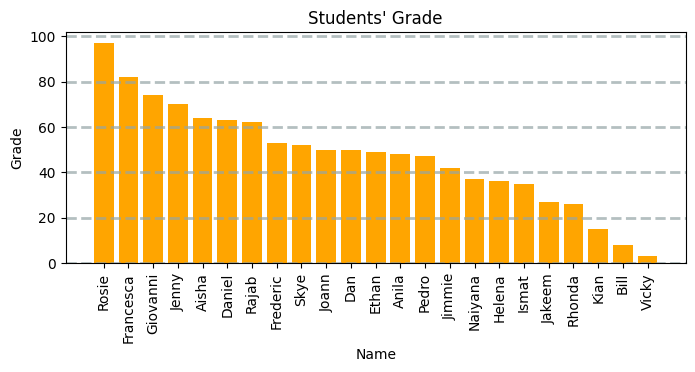

In [31]:
#Explicitly create the figure, simultaneously set the size 
figure = plt.figure(figsize=(8,3))

#Create a bar plot of name vs grade, and define the color as orange
plt.bar(x = df_students.Name, height= df_students.Grade, color = 'orange')

#Customize the chart
plt.title("Students' Grade")
plt.xlabel("Name")
plt.ylabel("Grade")
plt.grid(color = '#95a5a6', linestyle = '--', linewidth = 2, axis= 'y', alpha = 0.7)
plt.xticks(rotation = 90)

#Display the plot 
plt.show()

C:\Users\wangy\AppData\Local\Temp\ipykernel_2900\362627860.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_students.Name, rotation = 90)
C:\Users\wangy\AppData\Local\Temp\ipykernel_2900\362627860.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


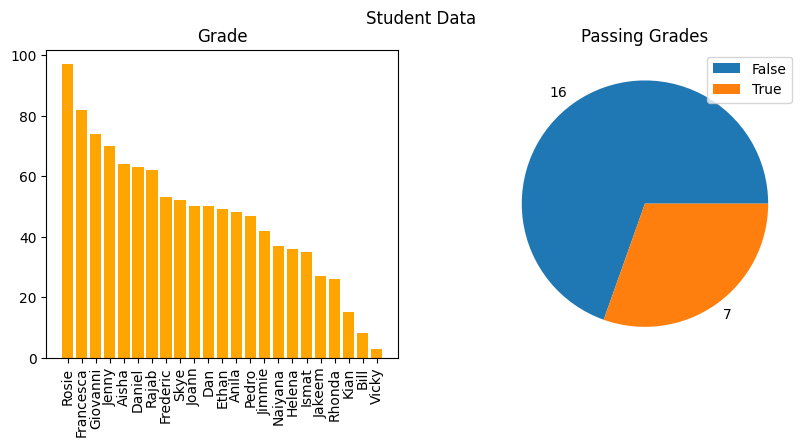

In [32]:
#Create a figure for 2 subplots(1 row, 2 columns)
fig, ax = plt.subplots(1,2, figsize = (10,4))

#Create a bar plot of name vs grade on the first axis
ax[0].bar(x = df_students.Name, height = df_students.Grade, color = 'orange')
ax[0].set_title('Grade')
ax[0].set_xticklabels(df_students.Name, rotation = 90)

#Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels = pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

#Add a title to the figure
fig.suptitle('Student Data')

#Show the figure
fig.show()

```python
# 创建一行两列的子图框架，设置整个图形的尺寸为宽度10英寸和高度4英寸
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# 在第一个子图中创建柱状图，显示学生的姓名和成绩，柱子颜色为橙色
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')  # 设置子图的标题为"Grades"
ax[0].set_xticklabels(df_students.Name, rotation=90)  # 设置x轴标签，并旋转90度以便阅读

# 在第二个子图中创建饼图，显示通过情况的统计
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts.index)  # 使用计数作为饼图的大小，索引作为标签
ax[1].set_title('Passing Grades')  # 设置子图的标题为"Passing Grades"
ax[1].legend(pass_counts.index.tolist())  # 显示图例

# 为整个图形设置标题
fig.suptitle('Student Data')

# 显示图形
fig.show()


# Statistical Analysis

C:\Users\wangy\AppData\Local\Temp\ipykernel_2900\106995755.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


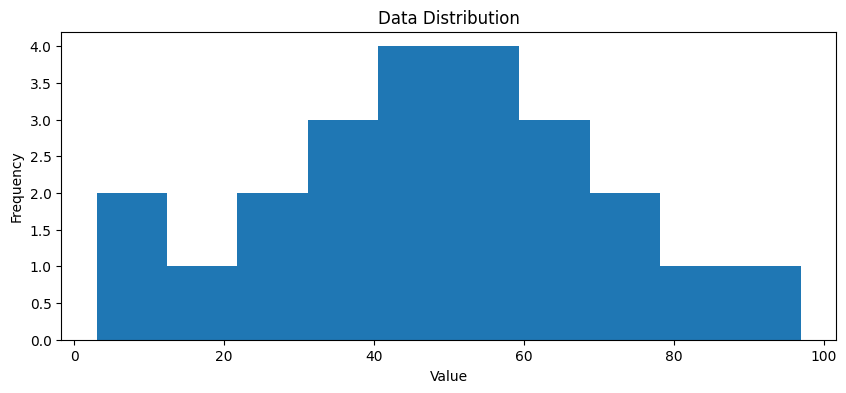

In [33]:
#Get the variable to examine
var_data = df_students['Grade']

#Create a figure
fig = plt.figure(figsize=(10,4))

#Plot a histogram
plt.hist(var_data)

#Add titiles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

#Show the figure
fig.show()

Mininum:3.00
Mean:47.39
Median:49.00
Mode:50.00Maxnum:97.00



C:\Users\wangy\AppData\Local\Temp\ipykernel_2900\3544244530.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


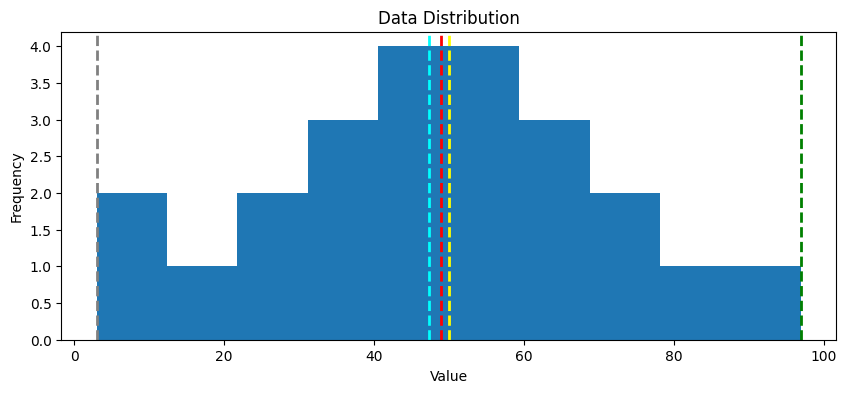

In [34]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Mininum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}Maxnum:{:.2f}\n'.format(min_val,mean_val,med_val,mod_val,max_val))

# Create a figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x = min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x = mean_val, color='cyan', linestyle = 'dashed', linewidth = 2)
plt.axvline(x = med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x = mod_val, color='yellow', linestyle = 'dashed', linewidth = 2)
plt.axvline(x = max_val, color = 'green', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show() 

C:\Users\wangy\AppData\Local\Temp\ipykernel_2900\2925698966.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_box.show()


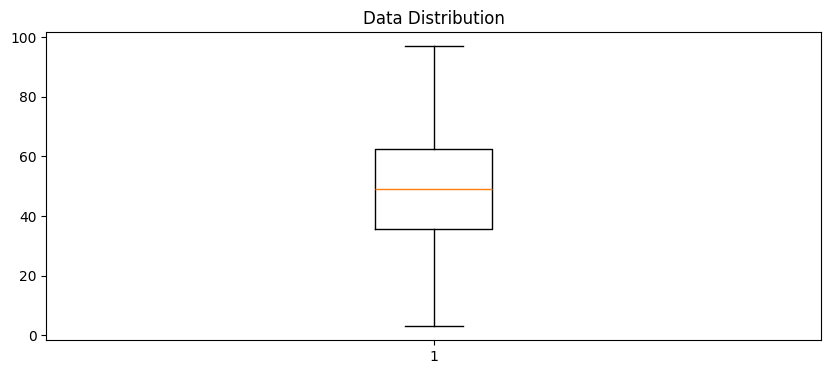

In [35]:
#Create a box figure
fig_box = plt.figure(figsize=(10,4))

plt.boxplot(var)
plt.title('Data Distribution')
fig_box.show()

Mininum:3.00
Mean:47.39
Median:49.00
Mode:50.00
Maxnum:97.00



C:\Users\wangy\AppData\Local\Temp\ipykernel_2900\1431830595.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


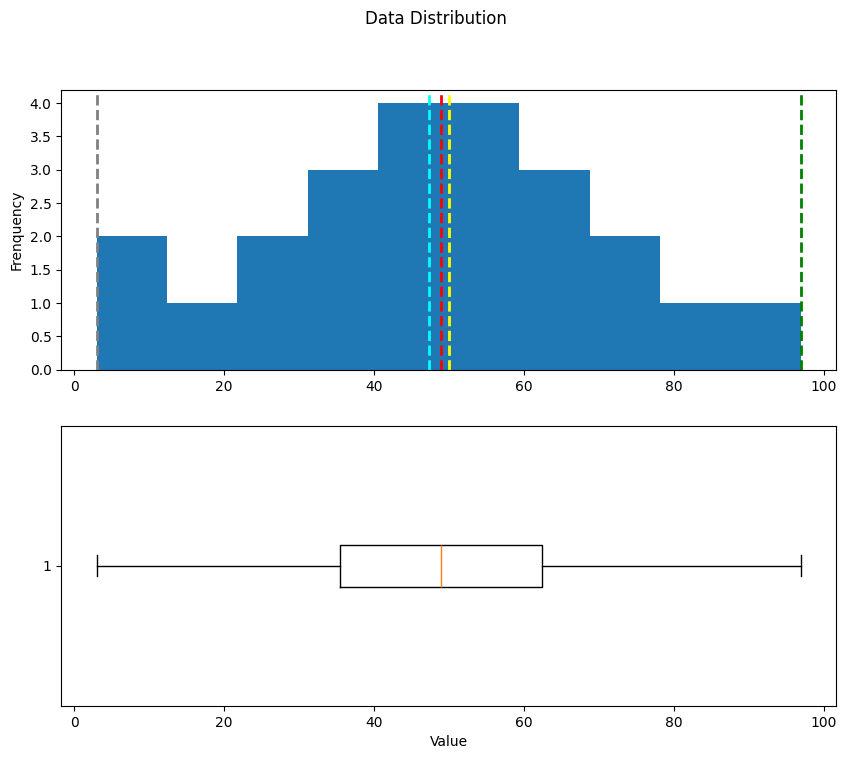

In [36]:
# Create a function so that we can re-use 
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var.min()
    max_val = var.max()
    mean_val = var.mean()
    med_val = var.median()
    mod_val = var.mode()[0]
    
    print('Mininum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaxnum:{:.2f}\n'.format(min_val,mean_val,med_val,mod_val,max_val))
    
    # Create a figure for 2 subplots(2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize= (10,8))

    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frenquency')

    # Add lines for statistics
    ax[0].axvline(x = min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x = mean_val, color='cyan', linestyle = 'dashed', linewidth = 2)
    ax[0].axvline(x = med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x = mod_val, color='yellow', linestyle = 'dashed', linewidth = 2)
    ax[0].axvline(x = max_val, color = 'green', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False) #vert=False argument specifies that the boxplot should be horizontal rather than the default vertical orientation.
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figures
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col) 




In [37]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2, label = 'Mean')
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2, label='Median')
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2, label='Mode')

    # Show the legend
    plt.legend() 
    
    # Show the figure
    plt.show()



Mininum:3.00
Mean:47.39
Median:49.00
Mode:50.00
Maxnum:97.00



C:\Users\wangy\AppData\Local\Temp\ipykernel_2900\1431830595.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


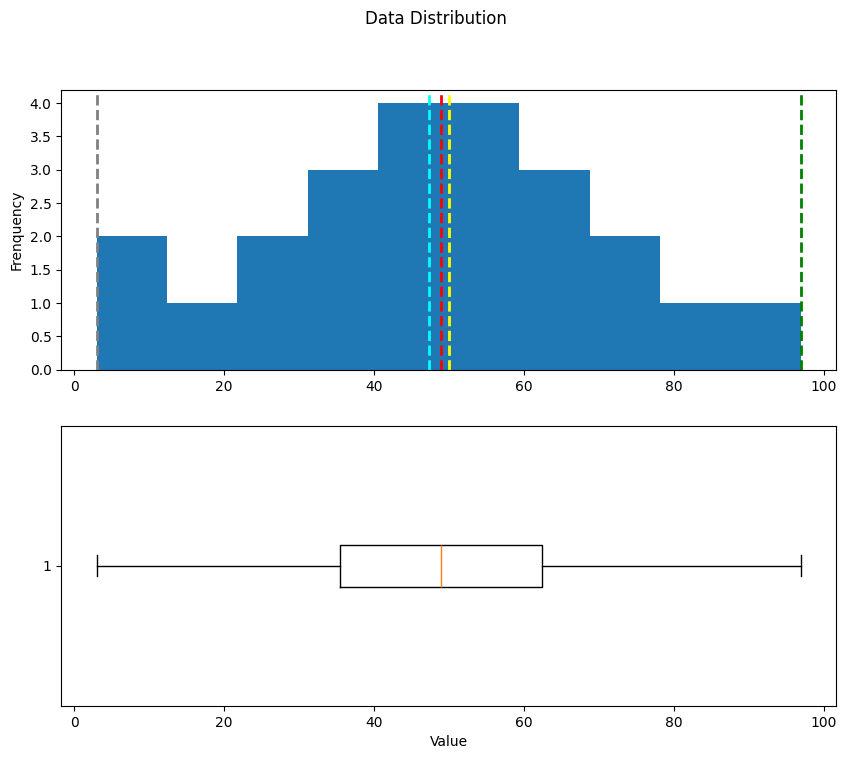

In [38]:
show_distribution(df_students['Grade'])

Mininum:3.00
Mean:47.39
Median:49.00
Mode:50.00
Maxnum:97.00



C:\Users\wangy\AppData\Local\Temp\ipykernel_2900\1431830595.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


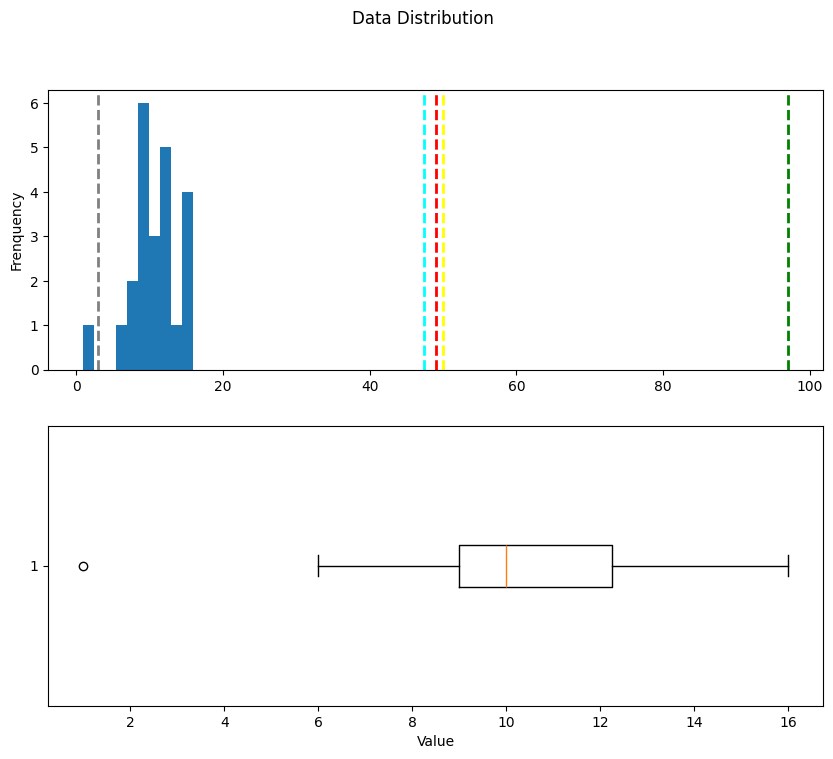

In [39]:
# Get the density of Grade
col = df_students['StudyHours']
show_distribution(col)


Mininum:3.00
Mean:47.39
Median:49.00
Mode:50.00
Maxnum:97.00



C:\Users\wangy\AppData\Local\Temp\ipykernel_2900\1431830595.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


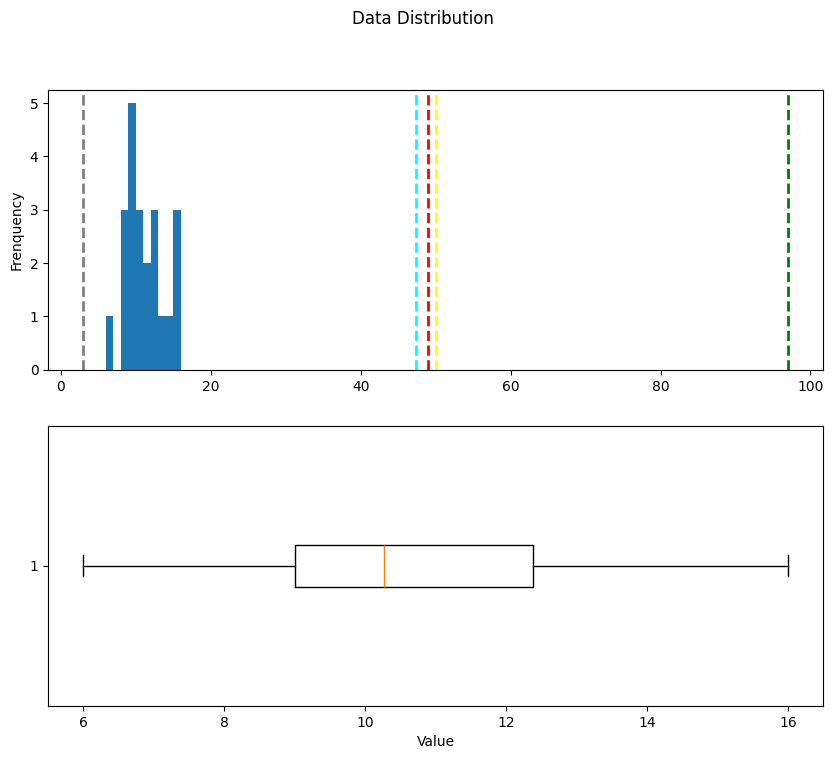

In [40]:
# calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)
# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']
# Call the display distribution function
show_distribution(col)
# Pandas quantile function to exclude observations below the 0.01th percentile (the value above which 99% of the data reside).

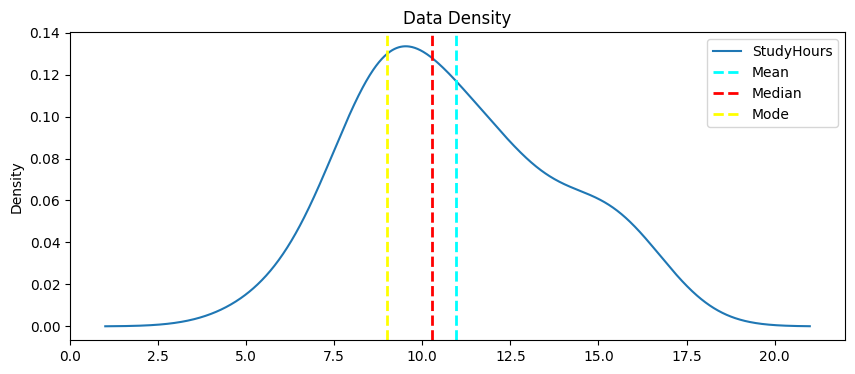

In [41]:
# Get the density of StudyHours
show_density(col)

## Measures of variance
Typical statistics that measure variability in the data include:

- **Range**: The difference between the maximum and minimum. There's no built-in function for this, but it's easy to calculate using the **min** and **max** functions.
- **Variance**: The average of the squared difference from the mean. You can use the built-in **var** function to find this.
- **Standard Deviation**: The square root of the variance. You can use the built-in **std** function to find this.

In [42]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max()-col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range:{:.2f}\n - Variance:{:.2f}\n - Std.Dev: {:.2f}'.format(col_name,rng,var,std))



Grade:
 - Range:94.00
 - Variance:524.79
 - Std.Dev: 22.91

StudyHours:
 - Range:15.00
 - Variance:11.61
 - Std.Dev: 3.41


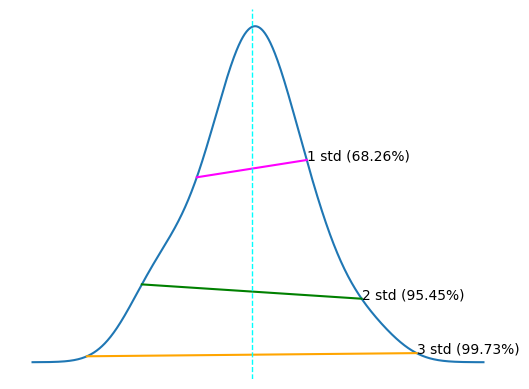

In [45]:
# Get the grade column
col = df_students['Grade']

# Get the density
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

# Get the mean and the standard deviation
s = col.std()
m = col.mean()

# Annotate 1 stdev 
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1, y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1], y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2, y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')

plt.show()


In [46]:
df_students.describe()

,StudyHours,Grade
count,23.000000,23.000000
mean,10.522727,47.391304
std,3.406969,22.908393
min,1.000000,3.000000
25%,9.000000,35.500000
50%,10.000000,49.000000
75%,12.250000,62.500000
max,16.000000,97.000000


In [47]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample

,Name,StudyHours,Grade,Pass
3,Rosie,16.000000,97.0,True
10,Francesca,15.500000,82.0,True
9,Giovanni,14.500000,74.0,True
14,Jenny,15.500000,70.0,True
21,Aisha,12.000000,64.0,True
20,Daniel,12.500000,63.0,True
11,Rajab,13.750000,62.0,True
6,Frederic,11.500000,53.0,False
19,Skye,12.000000,52.0,False
1,Joann,11.500000,50.0,False


<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

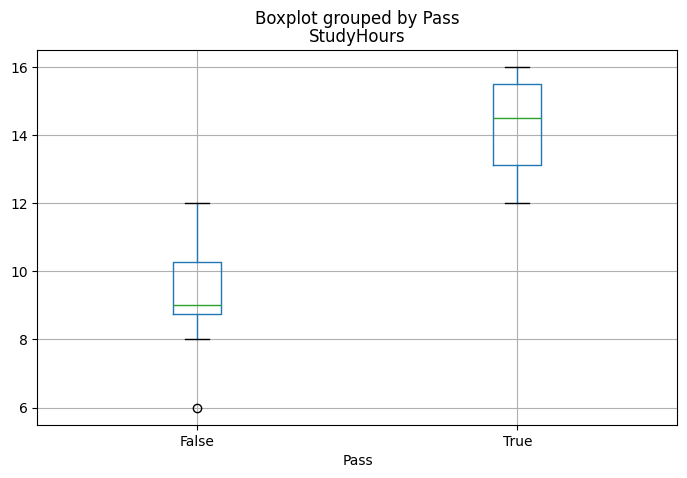

In [48]:
# Comparing numeric and categorical variables
df_sample.boxplot(column='StudyHours',by='Pass',figsize=(8,5))

<Axes: xlabel='Name'>

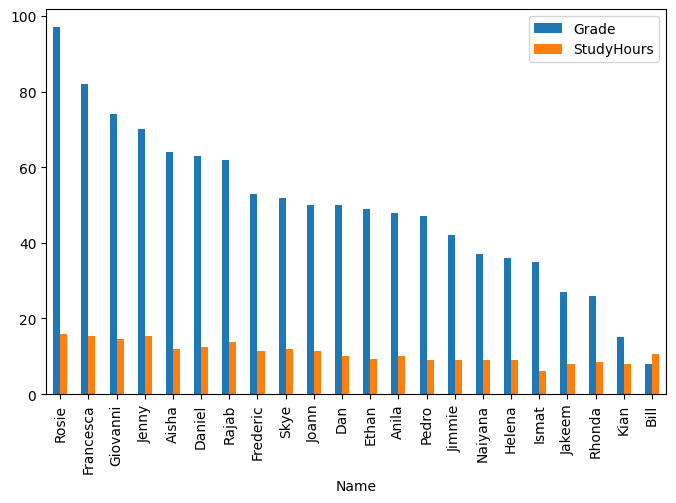

In [49]:
# Create a bar plot of name vs gradw and study hours
df_sample.plot(x='Name',y=['Grade','StudyHours'],kind='bar', figsize=(8,5))

<Axes: xlabel='Name'>

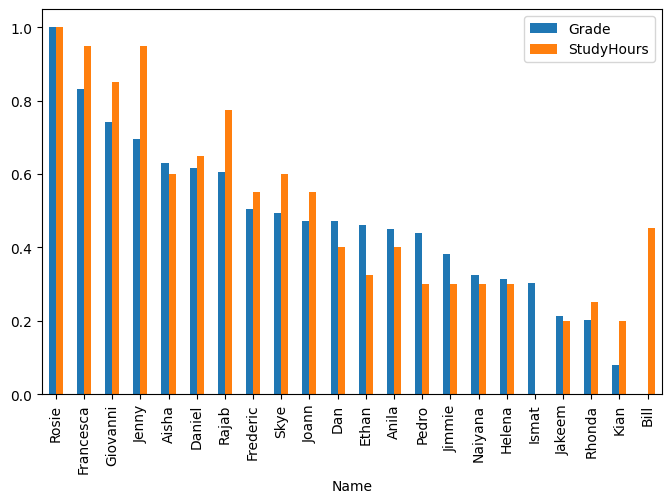

In [52]:
# Normalize the numeric varibles to compare them with different scale

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name','Grade','StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name',y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

In [53]:
# A statistical correlation measurement we can use to quantify the relationship between 'Grade' and 'StudyHours'
df_normalized.Grade.corr(df_normalized.StudyHours)

0.8356158807992954

The correlation statistic is a value between -1 and 1 that indicates the strength of a relationship. Values above 0 indicate a *positive* correlation (high values of one variable tend to coincide with high values of the other), while values below 0 indicate a *negative* correlation (high values of one variable tend to coincide with low values of the other). In this case, the correlation value is close to 1, showing a strongly positive correlation between study time and grade.

> **Note**: Data scientists often quote the maxim "*correlation* is not *causation*." In other words, as tempting as it might be, you shouldn't interpret the statistical correlation as explaining *why* one of the values is high. In the case of the student data, the statistics demonstrate that students with high grades tend to also have high amounts of study time, but this is not the same as proving that they achieved high grades *because* they studied a lot. You could equally use the statistic as evidence to support the nonsensical conclusion that the students studied a lot *because* their grades were going to be high.

Another way to visualize the apparent correlation between two numeric columns is to use a *scatter* plot.

<Axes: title={'center': 'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

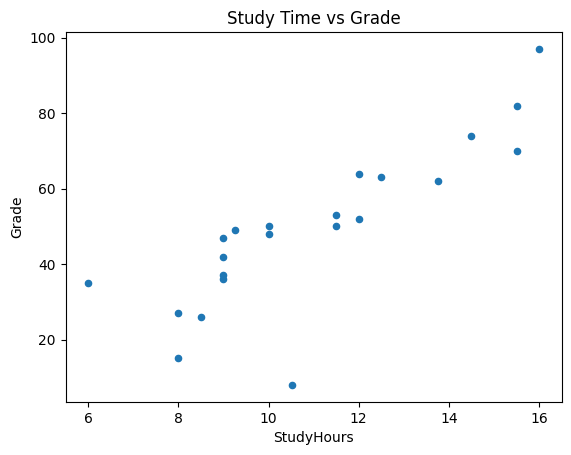

In [54]:
# Create a scatter plot
df_sample.plot.scatter(title='Study Time vs Grade',x = 'StudyHours', y='Grade')

slope:6.4227
y-intercept:-20.9548
so...
 f(x)=6.4227x+-20.9548


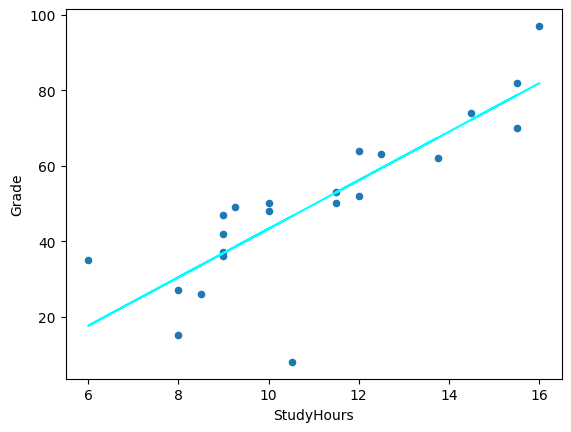

In [57]:
# Define df_regression
df_regression = df_sample[['Grade','StudyHours']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['StudyHours'],df_regression['Grade'])
print('slope:{:.4f}\ny-intercept:{:.4f}'.format(m,b))
print('so...\n f(x)={:.4f}x+{:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')

# Display the plot
plt.show()

In [58]:
# Show the original x,y values the f(x) value, and the error
df_regression[['StudyHours','Grade','fx','error']]

,StudyHours,Grade,fx,error
3,16.000000,97.0,81.807685,-15.192315
10,15.500000,82.0,78.596356,-3.403644
9,14.500000,74.0,72.173698,-1.826302
14,15.500000,70.0,78.596356,8.596356
21,12.000000,64.0,56.117053,-7.882947
20,12.500000,63.0,59.328382,-3.671618
11,13.750000,62.0,67.356705,5.356705
6,11.500000,53.0,52.905724,-0.094276
19,12.000000,52.0,56.117053,4.117053
1,11.500000,50.0,52.905724,2.905724


In [59]:
# Define a function based on our regression coefficients
def f(x):
    m = 6.3134
    n = -17.9174
    return m*x+b
study_time = 14

# Get f(x) for the study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100,prediction))

# Print the estimated grade
print('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time,expected_grade))

Studying for 14 hours per week may result in a grade of 67
